# CEMENT STRENGTH PREDICTION MODEL

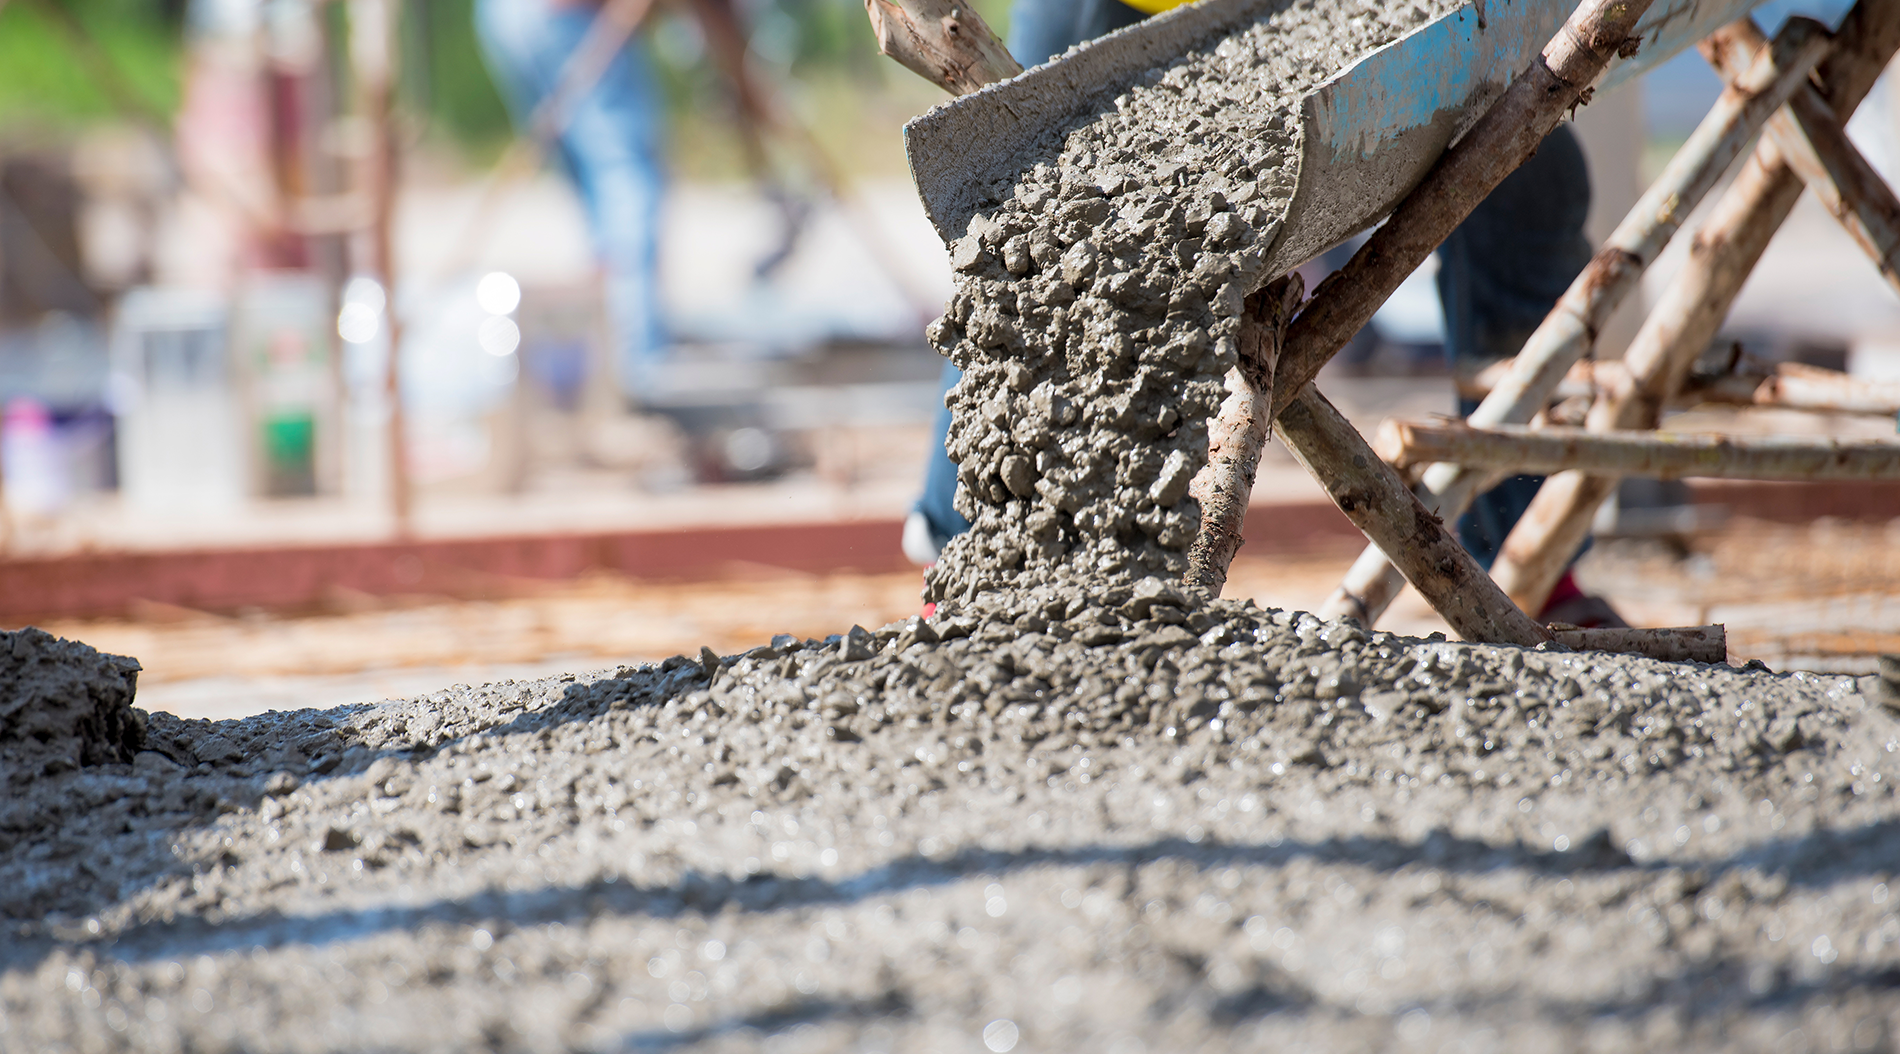

In [2]:
from IPython.display import Image
Image(filename='/Users/adityaanandraogaikwad/Desktop/Ml Updated /Cement/cement.png',width=1100,height=400)

# Introduction
The Cement Strength Prediction Model is designed to predict the compressive strength of cement based on a set of input features. 
The strength of cement is a critical property that directly influences the quality and durability of construction materials. 
Predicting this property accurately can greatly enhance material efficiency and help in the quality control of cement production.
In this project, a machine learning-based regression model is built to predict the compressive strength of cement. 
The model takes various characteristics of cement mixtures as input and provides an estimated value of the cement's strength. 
By doing so, it assists engineers and researchers in improving cement formulations, optimizing production processes, and ensuring the consistency of cement quality.

## Information about dataset
The dataset used for this project includes various input features that describe the characteristics of cement mixtures. These features typically include:

- Cement (kg): The amount of cement in the mix.
- Blast Furnace Slag (kg): The amount of slag used in the cement formulation.
- Fly Ash (kg): The proportion of fly ash in the mix.
- Water (kg): The amount of water used in the mixture.
- Superplasticizer (kg): The quantity of superplasticizer.
- Coarse Aggregate (kg): Amount of coarse aggregates in the mix.
- Fine Aggregate (kg): Amount of fine aggregates used.
- Age (days): The age of the cement, typically measured in days.
- compressive strength: The compressive strength of the cement.
                
The target variable, compressive strength, is usually recorded in megapascals (MPa), which quantifies the cement's ability to withstand compression forces.

### Insights & Applications
Key Findings: The model's ability to predict cement strength provides valuable insights into the optimal mixture ratios for achieving the desired compressive strength. 
For example, the relative proportions of water, cement, and other additives like fly ash can be tuned based on the model’s predictions to maximize the cement's strength.

- Material Optimization: The model can help cement manufacturers optimize material costs by determining the most cost-effective mixture for achieving high-strength cement. For instance, the use of alternative materials like slag or fly ash can be explored without compromising on strength.

- Process Monitoring: By predicting cement strength in real-time or batch processes, the model allows continuous monitoring and adjustment of mixing operations, reducing variability and ensuring consistent product quality.

- Sustainability Impact: The model also contributes to sustainable practices by helping to balance the use of cement with more environmentally friendly alternatives like slag and fly ash. Minimizing cement usage without affecting strength can lead to more eco-friendly construction materials.

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from collections import OrderedDict

In [7]:
try:
    df = pd.read_csv('/Users/adityaanandraogaikwad/Desktop/CLASS DATA/DATA SET/concrete_data.csv')
    print('Data loaded sucessfully')
except:
    print('Error in data loading')

Data loaded sucessfully


In [8]:
df.sample(frac=1) # It shuffels the every time.

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
100   425.0               106.3      0.0  153.5              16.5   
104   318.8               212.5      0.0  155.7              14.3   
15    380.0                 0.0      0.0  228.0               0.0   
584   228.0               342.1      0.0  185.7               0.0   
12    427.5                47.5      0.0  228.0               0.0   
..      ...                 ...      ...    ...               ...   
594   316.1               210.7      0.0  185.7               0.0   
274   251.4                 0.0    118.3  188.5               5.8   
221   166.1                 0.0    163.3  176.5               4.5   
984   154.8                 0.0    142.8  193.3               9.1   
846   366.0               187.0      0.0  191.0               7.0   

     coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
100             852.1            887.1    7                          49.20  
104             852.1            880.4    7                          33.40  
15              932.0            670.0   90                          52.91  
584             955.8            674.3    7                          21.92  
12              932.0            594.0  270                          43.01  
..                ...              ...  ...                            ...  
594             977.0            689.3    7                          24.44  
274            1028.4            757.7    3                          17.22  
221            1058.6            780.1   28                          21.54  
984             877.2            867.7   28                           9.74  
846             824.0            757.0   28                          65.91  

[1030 rows x 9 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


- The data contains 1030 entries and 9 columns
- We have all numerical columns
- There is no null values

In [11]:
# Univariate analysis

stats = []

for i in df.columns:
    numerical_stats = OrderedDict({
        'Features':i,
        'Mean':df[i].mean(),
        'Median(50%)':df[i].median(),
        'Standard Deviation':df[i].std(),
        'Min':df[i].min(),
        'Max':df[i].max(),
        'Variance':df[i].var(),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurt(),
        '25%':df[i].quantile(0.25),
        '75%':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25)
    })

    stats.append(numerical_stats)

report = pd.DataFrame(stats)
report.T

0                   1            2           3  \
Features                 cement  blast_furnace_slag      fly_ash       water   
Mean                 281.167864           73.895825     54.18835  181.567282   
Median(50%)               272.9                22.0          0.0       185.0   
Standard Deviation   104.506364           86.279342    63.997004   21.354219   
Min                       102.0                 0.0          0.0       121.8   
Max                       540.0               359.4        200.1       247.0   
Variance            10921.58022         7444.124812  4095.616541  456.002651   
Skewness               0.509481            0.800717     0.537354    0.074628   
Kurtosis              -0.520652           -0.508175    -1.328746    0.122082   
25%                     192.375                 0.0          0.0       164.9   
75%                       350.0              142.95        118.3       192.0   
IQR                     157.625              142.95        118.3        27.1   

                                   4                 5                6  \
Features            superplasticizer  coarse_aggregate  fine_aggregate    
Mean                         6.20466        972.918932       773.580485   
Median(50%)                      6.4             968.0            779.5   
Standard Deviation          5.973841         77.753954         80.17598   
Min                              0.0             801.0            594.0   
Max                             32.2            1145.0            992.6   
Variance                   35.686781       6045.677357      6428.187792   
Skewness                    0.907203          -0.04022         -0.25301   
Kurtosis                    1.411269         -0.599016        -0.102177   
25%                              0.0             932.0           730.95   
75%                             10.2            1029.4            824.0   
IQR                             10.2              97.4            93.05   

                              7                              8  
Features                    age  concrete_compressive_strength  
Mean                  45.662136                      35.817961  
Median(50%)                28.0                         34.445  
Standard Deviation    63.169912                      16.705742  
Min                         1.0                           2.33  
Max                       365.0                           82.6  
Variance            3990.437729                     279.081814  
Skewness               3.269177                       0.416977  
Kurtosis              12.168989                      -0.313725  
25%                         7.0                          23.71  
75%                        56.0                         46.135  
IQR                        49.0                         22.425

- From above analysis we can see that the data is not normally distributed.
- also see the statistical analysis about the data.

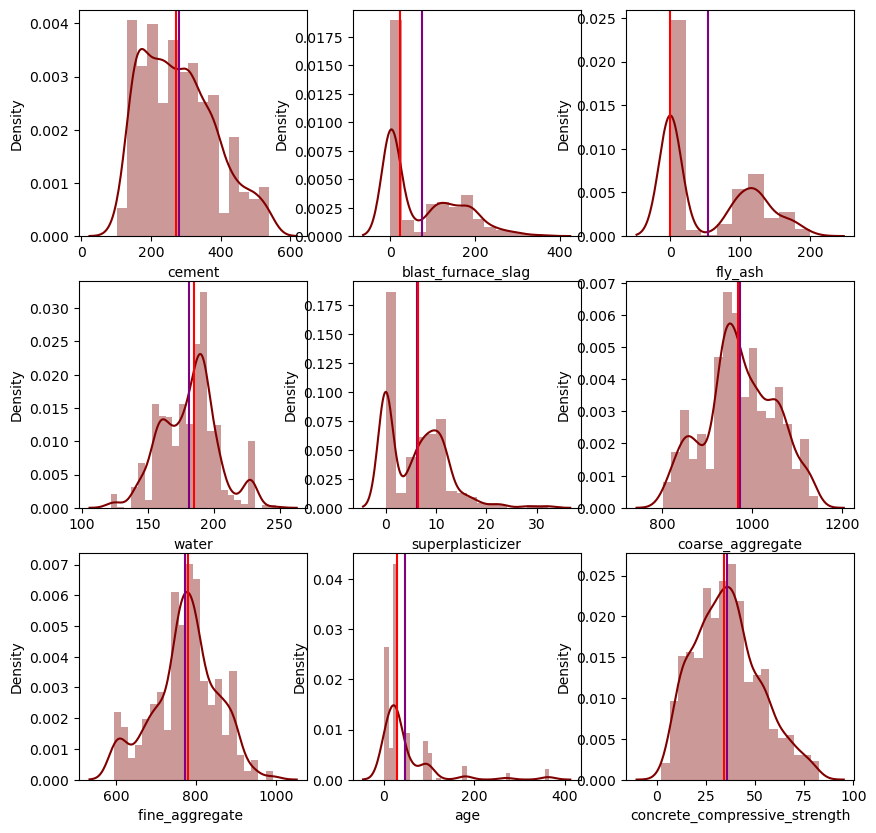

In [13]:
# Visual representation of data distribution
plt.figure(figsize=(10,10))
plot = 0
for i in df.columns:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.distplot(df[i],hist=True,color='maroon')
    plt.axvline(df[i].mean(),color='purple',label='mean')
    plt.axvline(df[i].median(),color='red',label='median')
    
plt.show()

- From above data we can get to know the data is not a normally distributed around the mean 
  and also contains few outliers and which is considerable.
- The data is not scaled so need to be scaling.

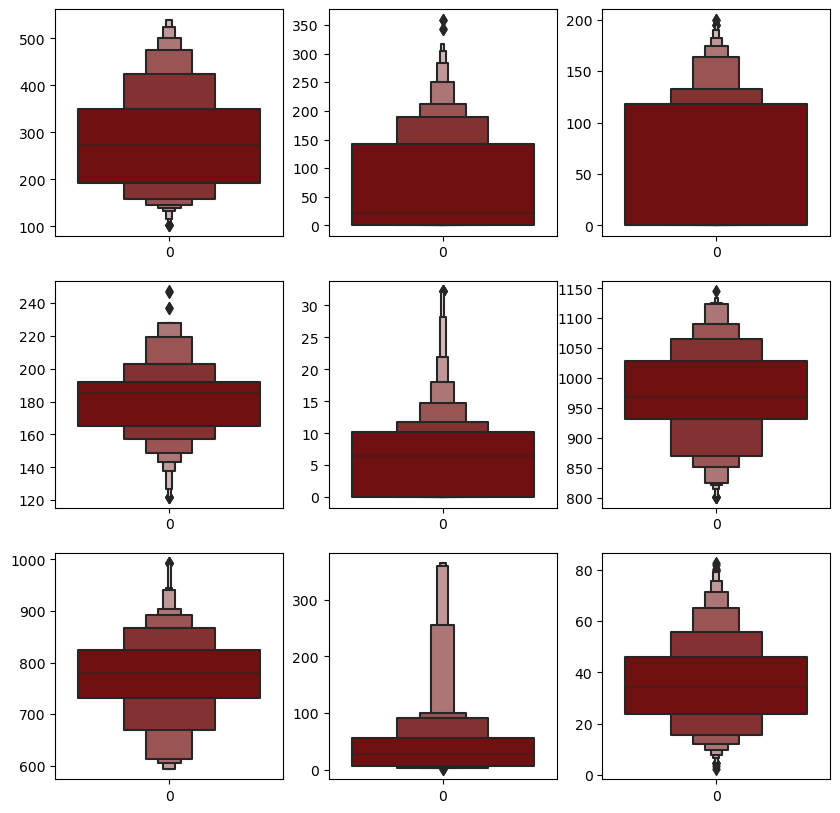

In [15]:
# Visual representation of outliers
plt.figure(figsize=(10,10))
plot = 0
for i in df.columns:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.boxenplot(df[i],color='maroon')
plt.show()

- The data contains few outliers but can telerate or can remove after the analysis

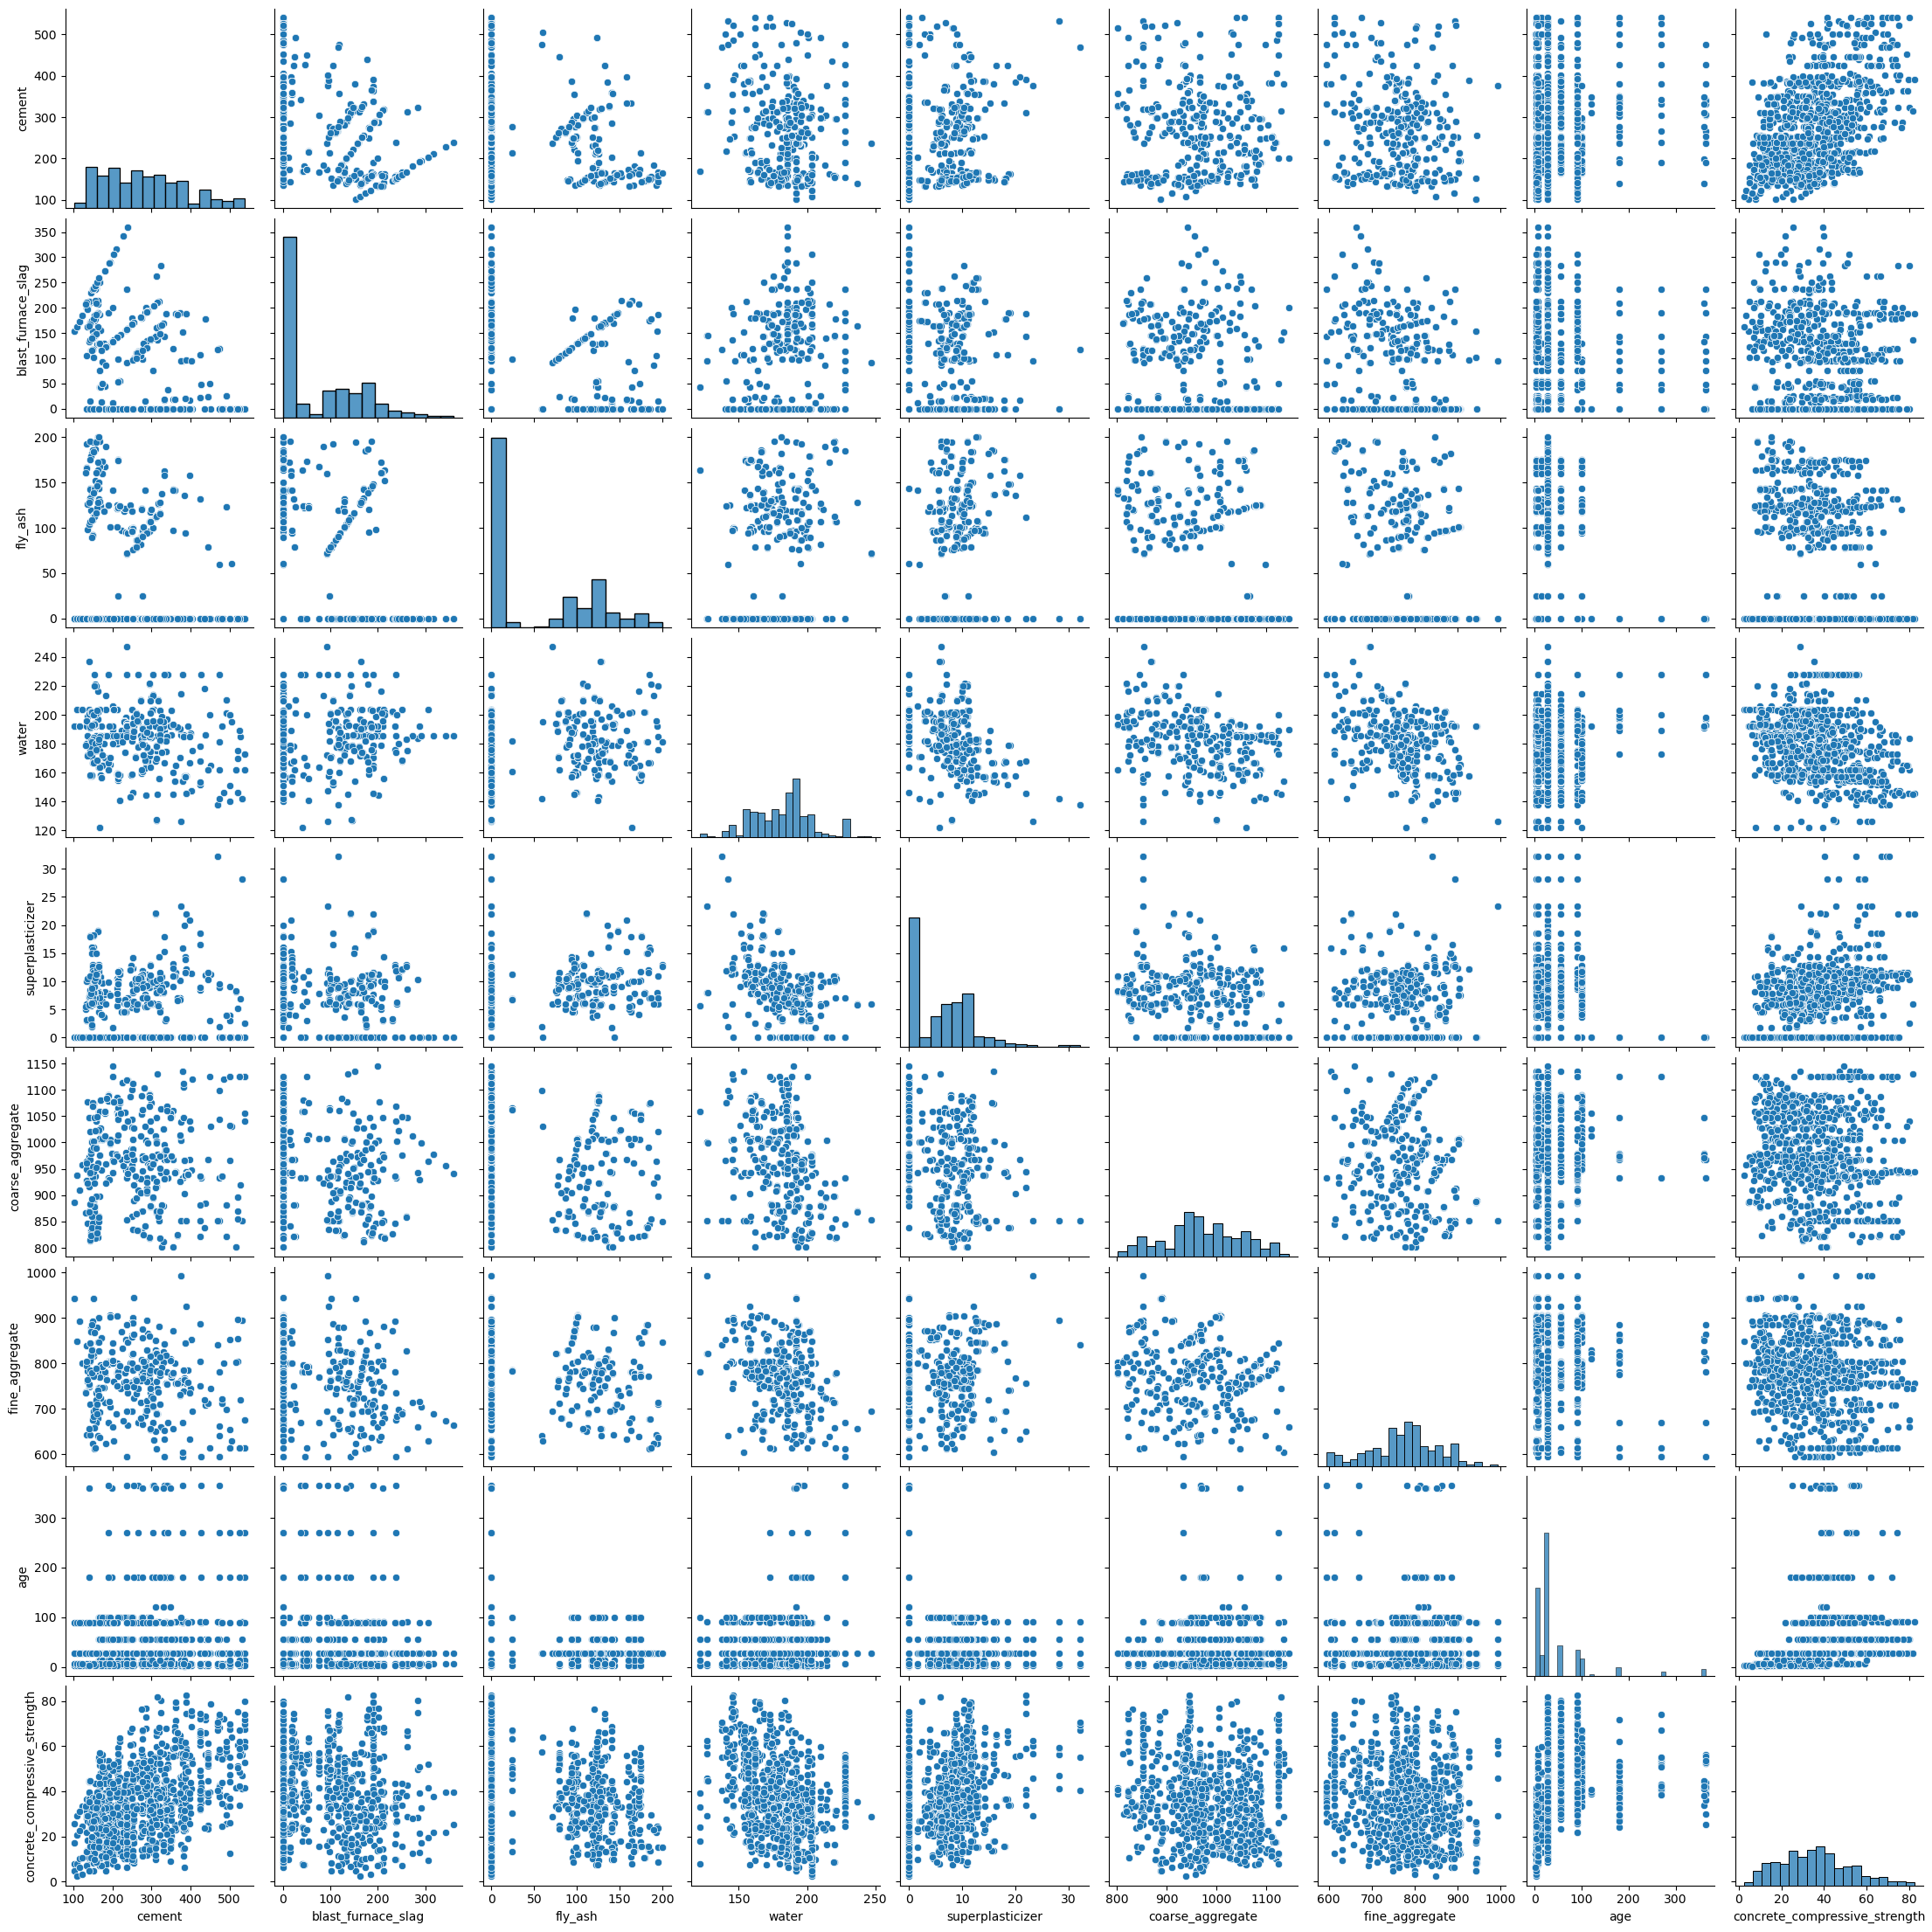

In [17]:
sns.pairplot(df,palette='pastel')

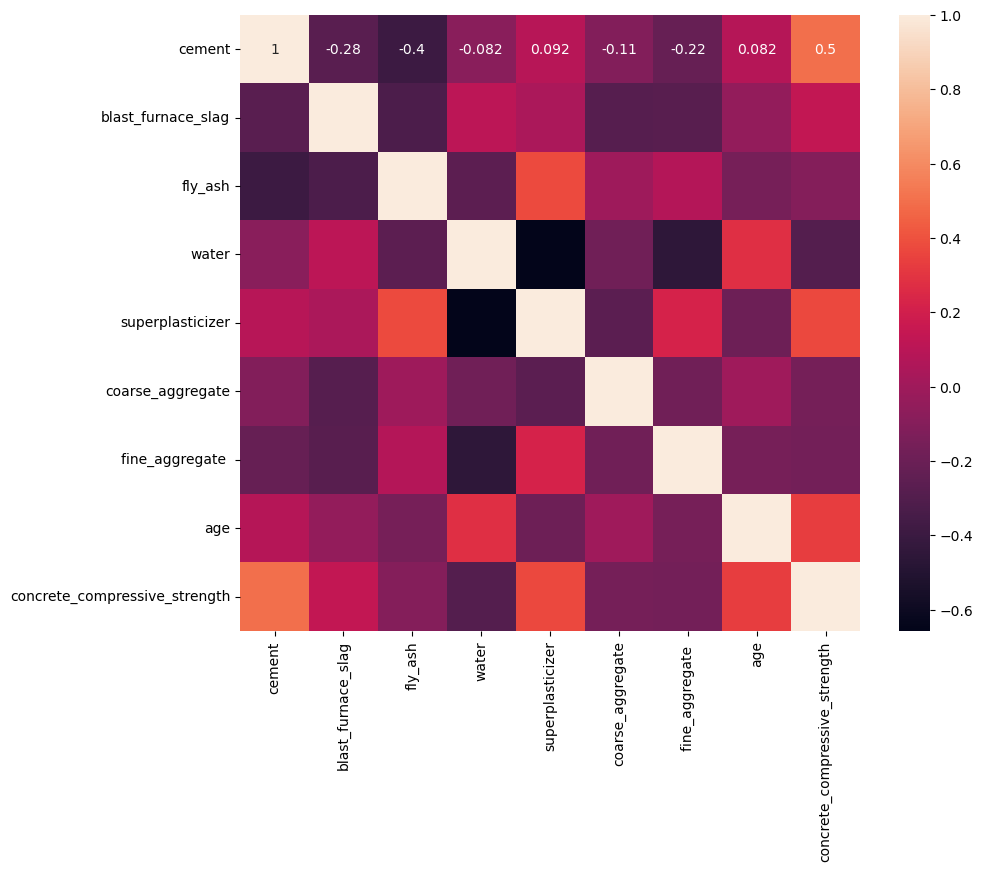

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
plt.show()

In [19]:
# Feature Engineering
df['compsite'] = (df['cement'] +df['blast_furnace_slag'] + df['superplasticizer'])/df['water']

In [20]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength', 'compsite'],
      dtype='object')

In [21]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
compsite                         0.620196
Name: concrete_compressive_strength, dtype: float64

- Checked the correlation between the columns to see how the feauture columns are affected with the target column.

In [23]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength', 'compsite'],
      dtype='object')

In [24]:
X = df.drop(columns=['concrete_compressive_strength'])
y = df['concrete_compressive_strength']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

### Yeo-Johnson Technique

In [26]:
from sklearn.preprocessing import PowerTransformer
scalar = PowerTransformer(method='yeo-johnson')
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

- Using Yeo-Johnsons technique we scale the data

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [29]:
models = {
    'Linear Regression': LinearRegression(),
    'DecisionTree Regressor': DecisionTreeRegressor(),
    'SVR': SVR(),
    'RandomForest Regressor': RandomForestRegressor()
}

for i in models:
    model = models[i]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('Model: ',i)
    print('Mean absolute error',mean_absolute_error(y_test,y_pred))
    print('Mean squared error',mean_squared_error(y_test,y_pred))
    print('r2 score',r2_score(y_test,y_pred))
    print('\n')

Model:  Linear Regression
Mean absolute error 5.546306917276413
Mean squared error 54.11717864472272
r2 score 0.8210324548508805


Model:  DecisionTree Regressor
Mean absolute error 5.373074433656958
Mean squared error 61.22163300970874
r2 score 0.7975377570642013


Model:  SVR
Mean absolute error 5.8510810886838565
Mean squared error 66.27169236764998
r2 score 0.7808370208325238


Model:  RandomForest Regressor
Mean absolute error 4.074881935583296
Mean squared error 34.96868555788324
r2 score 0.8843572416723519




- we tried all classic and parametrics machine learning algorithms but not satisfied with the accuracy 
- we need to try deep learning models

In [31]:
models = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [32]:
# Training accuracy
model.score(X_train,y_train)   

0.9833834644872932

In [33]:
# Testing accuracy
model.score(X_test,y_test)

0.8869678461646777

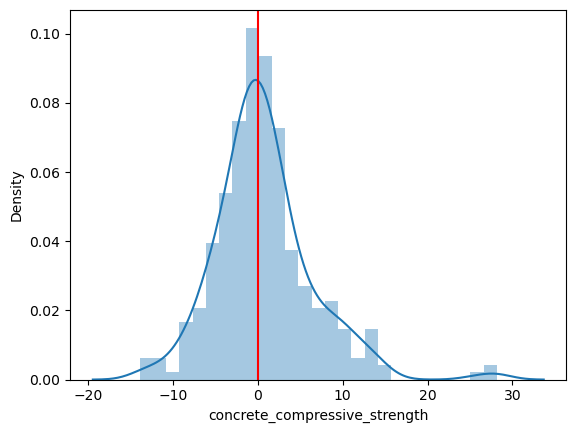

In [34]:
sns.distplot(y_test - y_pred)
plt.axvline(0,color='red')
plt.show()

# ANN TECHNIQUE

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Build ANN model
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

# Initialize and train model
model = build_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=32, verbose=1)

Epoch 1/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1486.8860 - mae: 35.2004 - val_loss: 1515.9149 - val_mae: 34.8665
Epoch 2/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1333.8256 - mae: 32.6680 - val_loss: 1095.2911 - val_mae: 28.6605
Epoch 3/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 837.2991 - mae: 24.5605 - val_loss: 246.5056 - val_mae: 12.0626
Epoch 4/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 169.3894 - mae: 10.4599 - val_loss: 127.8233 - val_mae: 8.8627
Epoch 5/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111.4984 - mae: 8.4497 - val_loss: 102.9851 - val_mae: 7.9064
Epoch 6/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 90.0331 - mae: 7.6945 - val_loss: 87.7876 - val_mae: 7.1537
Epoch 7/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 80.4616 - mae: 7.0984 - val_loss: 81.7651 - val_mae: 6.9065
Epoch 8/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.4810 - mae: 6.6913 - val_loss: 76.6668 - val_mae: 6.6648
Epoch 9/1000
23/23 

In [37]:
model.summary()

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,949 (136.52 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,300 (91.02 KB)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE: 5.1908
MAE: 3.4542
R² Score: 0.9109


# KERAS TUNER TECHNIQUE

In [39]:
import keras_tuner as kt


# Define the hypermodel function
def build_model(hp):
    model = keras.Sequential()
    
    # First layer (input layer)
    model.add(layers.Dense(
        hp.Int('units_1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))

    # Additional hidden layers (2 to 4 layers)
    for i in range(hp.Int('num_layers', 2, 4)):
        model.add(layers.Dense(
            hp.Int(f'units_{i+2}', min_value=32, max_value=256, step=32),
            activation='relu'
        ))
    
    # Output layer
    model.add(layers.Dense(1))

    # Compile model with tunable learning rate
    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', [1e-3, 5e-4, 1e-4])
        ),
        loss='mse',
        metrics=['mae']
    )

    return model

# Initialize Keras Tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=10,  # Number of models to try
    executions_per_trial=1,
    directory='keras_tuner_results',
    project_name='satellite_regression'
)

# Perform hyperparameter search
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Train best model
history = best_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Reloading Tuner from keras_tuner_results/satellite_regression/tuner0.json
Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1492.9489 - mae: 35.0149 - val_loss: 1208.1212 - val_mae: 30.4349
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 830.1860 - mae: 24.3218 - val_loss: 211.6207 - val_mae: 11.6713
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 186.8428 - mae: 11.0163 - val_loss: 112.5082 - val_mae: 8.3299
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108.1802 - mae: 8.2875 - val_loss: 90.9934 - val_mae: 7.3431
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87.6969 - mae: 7.4620 - val_loss: 78.6950 - val_mae: 6.6879
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 84.2874 - mae: 7.2067 - val_loss: 70.4893 - val_mae: 6.2621
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70.3308 - mae: 6.4188 - val_loss: 66.8473 - val_mae: 6.0579
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.5840 - mae: 6.320

In [40]:
# Predictions
y_pred = best_model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_hps.values}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Best Hyperparameters: {'units_1': 224, 'num_layers': 4, 'units_2': 128, 'units_3': 64, 'learning_rate': 0.0005, 'units_4': 128, 'units_5': 192}
RMSE: 5.4594
MAE: 3.9593
R² Score: 0.9014


# THANK YOU ...